### **spacy_text_classification : Exercise**


- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [1]:
#uncomment the below line and run this cell to install the large english model which is trained on wikipedia data

!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/400.7 MB ? eta -:--:--
     -------------------------------------- 0.5/400.7 MB 364.6 kB/s eta 0:18:18
     -------------------------------------- 0.5/400.7 MB 364.6 kB/s eta 0:18:18
     -------------------------------------- 0.5/400.7 MB 364.6 kB/s eta 0:18:18
     -------------------------------------- 0.8/400.7 MB 381.3 kB/s eta 0:17:29
     -------------------------------------- 1.0/400.7 MB 484.0 kB/s eta 0:13:46
     -----------

In [2]:
#import spacy and load the language model downloaded
import spacy

nlp = spacy.load('en_core_web_lg')

### **About Data: News Category Classifier**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under **Multi-class** classification Problem.

In [11]:
#import pandas library
import pandas as pd


#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json(r"C:\Users\teore\OneDrive\Documents\GitHub\NLP_tutorial\News_Category_Dataset_v3.json", lines=True)


#print the shape of data
print(df.shape)

#print the top5 rows
print(df.head())
df = df[['short_description', 'category']]
df = df[df['category'].isin(['SPORTS', 'CRIME', 'BUSINESS'])]
df.head()

(209527, 6)
                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you 

,short_description,category
17,"Maury Wills, who helped the Los Angeles Dodger...",SPORTS
26,Las Vegas never had a professional sports cham...,SPORTS
61,The race's organizers say nonbinary athletes w...,SPORTS
62,Varvaro pitched mostly with the Atlanta Braves...,SPORTS
67,Carlos Alcaraz defeated Casper Ruud in the U.S...,SPORTS


In [13]:
#check the distribution of labels 
print(df['category'].value_counts())

category
BUSINESS    5992
SPORTS      5077
CRIME       3562
Name: count, dtype: int64


In [15]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['category'].map({'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2})



#check the results with top 5 rows
df.head()

,short_description,category,label_num
17,"Maury Wills, who helped the Los Angeles Dodger...",SPORTS,1
26,Las Vegas never had a professional sports cham...,SPORTS,1
61,The race's organizers say nonbinary athletes w...,SPORTS,1
62,Varvaro pitched mostly with the Atlanta Braves...,SPORTS,1
67,Carlos Alcaraz defeated Casper Ruud in the U.S...,SPORTS,1


### **Preprocess the text**

In [16]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [17]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
df["preprocessed_text"] = df['short_description'].apply(preprocess)


In [18]:
#print the top 5 rows
print(df.head())

                                    short_description category  label_num  \
17  Maury Wills, who helped the Los Angeles Dodger...   SPORTS          1   
26  Las Vegas never had a professional sports cham...   SPORTS          1   
61  The race's organizers say nonbinary athletes w...   SPORTS          1   
62  Varvaro pitched mostly with the Atlanta Braves...   SPORTS          1   
67  Carlos Alcaraz defeated Casper Ruud in the U.S...   SPORTS          1   

                                    preprocessed_text  
17  Maury Wills help Los Angeles Dodgers win World...  
26       Las Vegas professional sport champion Sunday  
61  race organizer nonbinary athlete will register...  
62  varvaro pitch Atlanta Braves start law enforce...  
67  Carlos Alcaraz defeat Casper Ruud U.S. Open fi...  


### **Get the spacy embeddings for each preprocessed text**

In [19]:
#create a new column "vector" that store the vector representation of each pre-processed text
df['vector'] = df["preprocessed_text"].apply(lambda x: nlp(x).vector)
df

,short_description,category,label_num,preprocessed_text,vector
17,"Maury Wills, who helped the Los Angeles Dodger...",SPORTS,1,Maury Wills help Los Angeles Dodgers win World...,"[-0.22692755, 0.015900282, 0.09352721, -0.1712..."
26,Las Vegas never had a professional sports cham...,SPORTS,1,Las Vegas professional sport champion Sunday,"[0.003223336, 0.10902783, 0.22321767, -0.24396..."
61,The race's organizers say nonbinary athletes w...,SPORTS,1,race organizer nonbinary athlete will register...,"[0.109867595, 0.10476422, -0.077925436, 0.1621..."
62,Varvaro pitched mostly with the Atlanta Braves...,SPORTS,1,varvaro pitch Atlanta Braves start law enforce...,"[0.23650233, 0.3104185, -0.04316166, -0.017690..."
67,Carlos Alcaraz defeated Casper Ruud in the U.S...,SPORTS,1,Carlos Alcaraz defeat Casper Ruud U.S. Open fi...,"[-0.10875064, 0.17945594, 0.18366213, 0.04656,..."
...,...,...,...,...,...
209511,"""Analysts at Adobe combined historical purchas...",BUSINESS,0,analyst Adobe combine historical purchase upgr...,"[-0.108255826, 0.030924996, 0.054163676, 0.034..."
209523,"Afterward, Azarenka, more effusive with the pr...",SPORTS,1,afterward Azarenka effusive press normal credi...,"[-0.117085, 0.16860801, -0.09926672, 0.0749691..."
209524,"Leading up to Super Bowl XLVI, the most talked...",SPORTS,1,lead Super Bowl XLVI talk game end occur year ago,"[-0.041080005, 0.1316709, 0.04615022, -0.09777..."
209525,CORRECTION: An earlier version of this story i...,SPORTS,1,correction early version story incorrectly sta...,"[0.024472669, 0.20208417, 0.03771108, 0.025845..."


In [20]:
#print the top 5 rows
print(df.head())


                                    short_description category  label_num  \
17  Maury Wills, who helped the Los Angeles Dodger...   SPORTS          1   
26  Las Vegas never had a professional sports cham...   SPORTS          1   
61  The race's organizers say nonbinary athletes w...   SPORTS          1   
62  Varvaro pitched mostly with the Atlanta Braves...   SPORTS          1   
67  Carlos Alcaraz defeated Casper Ruud in the U.S...   SPORTS          1   

                                    preprocessed_text  \
17  Maury Wills help Los Angeles Dodgers win World...   
26       Las Vegas professional sport champion Sunday   
61  race organizer nonbinary athlete will register...   
62  varvaro pitch Atlanta Braves start law enforce...   
67  Carlos Alcaraz defeat Casper Ruud U.S. Open fi...   

                                               vector  
17  [-0.22692755, 0.015900282, 0.09352721, -0.1712...  
26  [0.003223336, 0.10902783, 0.22321767, -0.24396...  
61  [0.109867595, 0.104764

**Train-Test splitting**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['vector'].values, df['label_num'], test_size = 0.2, random_state = 2022, stratify=df['label_num'])

**Reshape the X_train and X_test so as to fit for models**

In [29]:
# import numpy as np
import numpy as np


#reshapes the X_train and X_test using 'stack' function of numpy. Store the result in new variables "X_train_2d" and "X_test_2d"
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

**Attempt 1:**


- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
dt = DecisionTreeClassifier()


#2. fit with all_train_embeddings and y_train
dt.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = dt.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      1199
           1       0.65      0.55      0.59      1016
           2       0.58      0.47      0.52       712

    accuracy                           0.61      2927
   macro avg       0.61      0.59      0.59      2927
weighted avg       0.61      0.61      0.61      2927



**Attempt 2:**


- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report



#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.fit_transform(X_test_2d)

#1. creating a MultinomialNB model object 
nb = MultinomialNB()


#2. fit with all_train_embeddings(scaled) and y_train
nb.fit(scaled_train_embed, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = nb.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.99      0.65      1199
           1       0.94      0.36      0.52      1016
           2       0.87      0.10      0.19       712

    accuracy                           0.56      2927
   macro avg       0.77      0.49      0.45      2927
weighted avg       0.74      0.56      0.49      2927



**Attempt 3:**


- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [43]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')


#2. fit with all_train_embeddings and y_train
knn.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = knn.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77      1199
           1       0.88      0.57      0.69      1016
           2       0.80      0.59      0.68       712

    accuracy                           0.73      2927
   macro avg       0.77      0.70      0.71      2927
weighted avg       0.76      0.73      0.72      2927



**Attempt 4:**


- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [44]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
rf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
rf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = rf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1199
           1       0.81      0.70      0.75      1016
           2       0.83      0.58      0.69       712

    accuracy                           0.75      2927
   macro avg       0.78      0.73      0.74      2927
weighted avg       0.77      0.75      0.75      2927



**Attempt 5:**


- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
gb = GradientBoostingClassifier()


#2. fit with all_train_embeddings and y_train
gb.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = gb.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1199
           1       0.84      0.70      0.76      1016
           2       0.80      0.62      0.70       712

    accuracy                           0.76      2927
   macro avg       0.78      0.74      0.75      2927
weighted avg       0.77      0.76      0.75      2927



**Print the confusion Matrix with the best model got**

Text(95.72222222222221, 0.5, 'Truth')

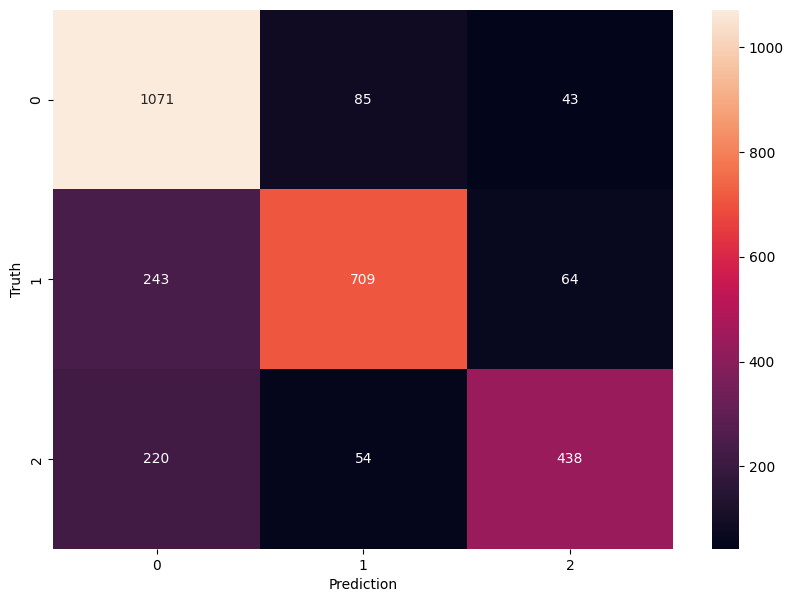

In [46]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## [**Solution**](./spacy_word_embeddings_solution.ipynb)